# FaceNet 

This notebook just carries out classification tasks with SVMs, which utilize **embeddings** extracted from notebook `facenet_keras_preprocessing_and_embeddings.ipynb`


## Perform Face Classification

In [1]:
%cd "../data/"
NUMPYFACEFOLDER = "../NumpyFace/"
EMBEDDINGFACEFOLDER = "../EmbeddingFace/"
MODELFOLDER = "../model/"

C:\Users\trihu\Documents\GitHub\FaceNet_MTCNN\data


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

from keras.models import load_model

from random import choice

from matplotlib import pyplot

In [3]:
def remove_nan(features, labels):
  if len(features[~np.isnan(features)])==0:
    print("No NAN value!")
    return features, labels
  new_features = []
  new_labels = []
  for i in range(len(features)):
    not_nan_embedding = features[i][~np.isnan(features[i])]
    if len(not_nan_embedding) != 0:
      new_features.append(not_nan_embedding)
      new_labels.append(labels[i])
  return np.asarray(new_features), np.asarray(new_labels)

In [5]:
# load dataset
# data = np.load(EMBEDDINGFACEFOLDER + '5-celebrity-faces-embeddings.npz')
# data = np.load(EMBEDDINGFACEFOLDER + 'ATT-embeddings.npz')
# data = np.load(EMBEDDINGFACEFOLDER + 'yalefaces-embeddings.npz')
# data = np.load(EMBEDDINGFACEFOLDER + 'extended_yale_face_B-embeddings.npz')
data = np.load(EMBEDDINGFACEFOLDER + 'extended_yale_faces_B_cropped-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Remove NAN embeddings

trainX, trainy = remove_nan(trainX, trainy)
testX, testy = remove_nan(testX, testy)

print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=12278, test=4090
Accuracy: train=96.767, test=96.064


Predicted: yaleB24 (99.245)
Expected: yaleB24


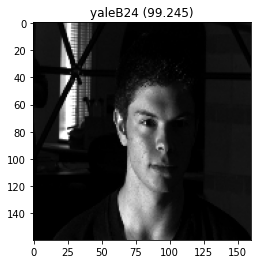

In [6]:
# load faces
# data = np.load(NUMPYFACEFOLDER + '5-celebrity-faces-dataset.npz')
# data = np.load(NUMPYFACEFOLDER + 'yalefaces.npz')
# data = np.load(NUMPYFACEFOLDER + 'ATT.npz')
data = np.load(NUMPYFACEFOLDER + 'extended_yale_face_B.npz')

testX_faces = data['arr_2']

# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

## Show pairs

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

# show_pair(2, 3)
# show_pair(2, 12)

## Missclassified images

##Dataset visualization
use t-SNE
